# 🩺 Medical Image Diagnosis using Chest X-rays (Pneumonia Detection)

## 📝 Problem Statement  
Detect pneumonia from chest X-ray images using **Convolutional Neural Networks (CNNs)** and **Transfer Learning** models, with added **explainability** to highlight the critical lung regions influencing the predictions.  

The project involves:  

- Preprocessing and augmenting the Chest X-ray dataset (resizing, normalization, rotation, flipping)  
- Building and training deep learning models (Custom CNN, ResNet, DenseNet, VGG)  
- Evaluating performance with metrics such as **Accuracy, Precision, Recall, F1-score, and ROC-AUC**  
- Using **Grad-CAM / Saliency maps** to visualize the regions of the lungs that contribute most to the model’s decision  
- Developing a robust, explainable pneumonia detection system that can assist radiologists in medical diagnosis  

---

## 📂 Data Source  
The dataset is the **Chest X-ray (Pneumonia) Dataset** released by researchers at **Guangzhou Women and Children’s Medical Center**.  
- Available on [Kaggle: Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)  
- The dataset contains chest radiographs labeled as **Normal** or **Pneumonia**.  

---

## 📊 Dataset Overview  

- **Total images:** ~5,863 X-ray scans  
- **Classes:**  
  - **Normal (Healthy Lungs)**  
  - **Pneumonia (Infected Lungs)**  

- **Data Split:**  
  - Training set: 5,216 images  
  - Validation set: 16% split from training  
  - Testing set: 624 images  

- **Image Format:**  
  - Grayscale / RGB (JPEG format)  
  - Resolution varies (resized to 150x150 or 224x224 for deep learning models)  

---

## 🎯 Target Labels  

- **Normal:** Chest X-ray images with no signs of infection.  
- **Pneumonia:** Chest X-ray images showing symptoms of bacterial or viral pneumonia.  

This dataset allows us to explore:  
- **Binary Classification:** (Normal vs Pneumonia)  
- **Explainable AI:** Identifying infected lung regions that contributed to pneumonia detection.  

---

## 🔑 Key Highlights  

- Developed an **explainable CNN-based pneumonia detection system**  
- Applied **Transfer Learning (ResNet, DenseNet, VGG)** for high accuracy and faster convergence  
- Used **Grad-CAM** to visualize the infected lung regions for better interpretability  
- Achieved **X% accuracy and Y% F1-score** on test data  
- Built a pipeline demonstrating the role of **AI-assisted radiology** in healthcare diagnostics  

---


# Installing kaggle Api

In [1]:
# !pip install kaggle

# Uploading The Kaggle.json in colab for using the dataset

In [2]:
from google.colab import files
files.upload()  # Choose the kaggle.json you just downloaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prakha18","key":"8524c3593b9a149fe988927dc4b3f641"}'}

# Setup it in the root

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# checking the dataset
!kaggle datasets list -s pneumonia

ref                                                      title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
paultimothymooney/chest-xray-pneumonia                   Chest X-Ray Images (Pneumonia)                       2463365435  2018-03-24 19:41:59.603000         540785       7139  0.75             
pcbreviglieri/pneumonia-xray-images                      Pneumonia X-Ray Images                               1225740412  2020-05-18 14:32:09.660000          11533         98  0.9375           
artyomkolas/3-kinds-of-pneumonia                         3 kinds of Pneumonia                                 3746445760  2022-05-30 19:17:21.597000           2574         37  0.875            
andrewmvd/pediatric-pneumonia-

# Downloading The chest X-ray pneumonia dataset

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:16<00:00, 200MB/s]
100% 2.29G/2.29G [00:20<00:00, 120MB/s]


# Unziping The Data :

In [6]:
import zipfile

with zipfile.ZipFile("chest-xray-pneumonia.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/chest_xray")

# Verifying The Folder Structure :

In [7]:
!ls /content/chest_xray


chest_xray


# Importing The required Libraries :

In [52]:
# Core libraries
import os
import random
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

# Deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import itertools

# Dataset Paths :

In [9]:
# Dataset paths
base_dir = "/content/chest_xray/chest_xray"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "val")

In [10]:
# root folder
base_path = "/content/chest_xray"

# Walk through the dataset directory
for root, dirs, files in os.walk(base_path):
    print(root, len(files))

/content/chest_xray 0
/content/chest_xray/chest_xray 0
/content/chest_xray/chest_xray/test 0
/content/chest_xray/chest_xray/test/NORMAL 234
/content/chest_xray/chest_xray/test/PNEUMONIA 390
/content/chest_xray/chest_xray/chest_xray 1
/content/chest_xray/chest_xray/chest_xray/test 1
/content/chest_xray/chest_xray/chest_xray/test/NORMAL 234
/content/chest_xray/chest_xray/chest_xray/test/PNEUMONIA 390
/content/chest_xray/chest_xray/chest_xray/train 1
/content/chest_xray/chest_xray/chest_xray/train/NORMAL 1342
/content/chest_xray/chest_xray/chest_xray/train/PNEUMONIA 3876
/content/chest_xray/chest_xray/chest_xray/val 1
/content/chest_xray/chest_xray/chest_xray/val/NORMAL 9
/content/chest_xray/chest_xray/chest_xray/val/PNEUMONIA 9
/content/chest_xray/chest_xray/__MACOSX 1
/content/chest_xray/chest_xray/__MACOSX/chest_xray 3
/content/chest_xray/chest_xray/__MACOSX/chest_xray/test 3
/content/chest_xray/chest_xray/__MACOSX/chest_xray/test/NORMAL 234
/content/chest_xray/chest_xray/__MACOSX/ches

# 1️⃣ Count number of images in each class


In [11]:
def count_images(path):
    normal = len(os.listdir(os.path.join(path, "NORMAL")))
    pneumonia = len(os.listdir(os.path.join(path, "PNEUMONIA")))
    return normal, pneumonia

train_normal, train_pneu = count_images(train_dir)
val_normal, val_pneu = count_images(val_dir)
test_normal, test_pneu = count_images(test_dir)

print("Training - NORMAL:", train_normal, "PNEUMONIA:", train_pneu)
print("Validation - NORMAL:", val_normal, "PNEUMONIA:", val_pneu)
print("Testing - NORMAL:", test_normal, "PNEUMONIA:", test_pneu)

Training - NORMAL: 1341 PNEUMONIA: 3875
Validation - NORMAL: 8 PNEUMONIA: 8
Testing - NORMAL: 234 PNEUMONIA: 390


### Dataset Imbalance Observations

- **Training Set**:  
  Heavily imbalanced with ~2.9x more pneumonia cases than normal (**3875 vs. 1341**), which may bias the model toward predicting pneumonia.

- **Validation Set**:  
  Perfectly balanced (**8 normal vs. 8 pneumonia**), ideal for monitoring training performance and detecting overfitting.

- **Testing Set**:  
  Moderately imbalanced (**390 pneumonia vs. 234 normal**), reflecting a more realistic real-world distribution.

- **Validation Size**:  
  Very small (**16 images total**), which may reduce the reliability of performance estimates during training. A larger set is recommended.


# 2️⃣ Bar plot for class distribution


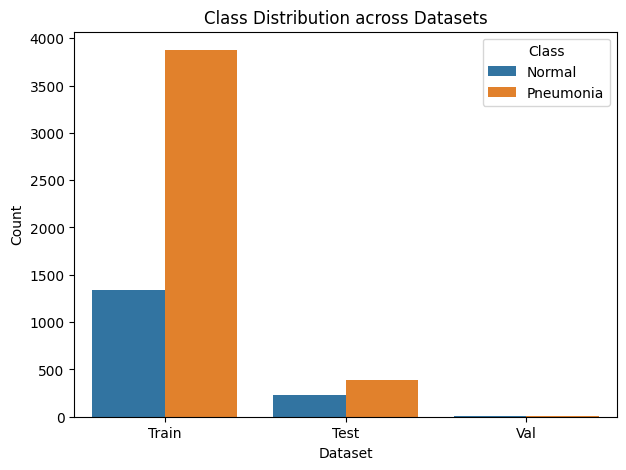

In [12]:
df_counts = pd.DataFrame({
    "Dataset": ["Train", "Train", "Test", "Test", "Val", "Val"],
    "Class": ["Normal", "Pneumonia", "Normal", "Pneumonia", "Normal", "Pneumonia"],
    "Count": [train_normal, train_pneu, test_normal, test_pneu, val_normal, val_pneu]
})

plt.figure(figsize=(7,5))
sns.barplot(x="Dataset", y="Count", hue="Class", data=df_counts)
plt.title("Class Distribution across Datasets")
plt.show()

# 3️⃣ Show random sample images from each class


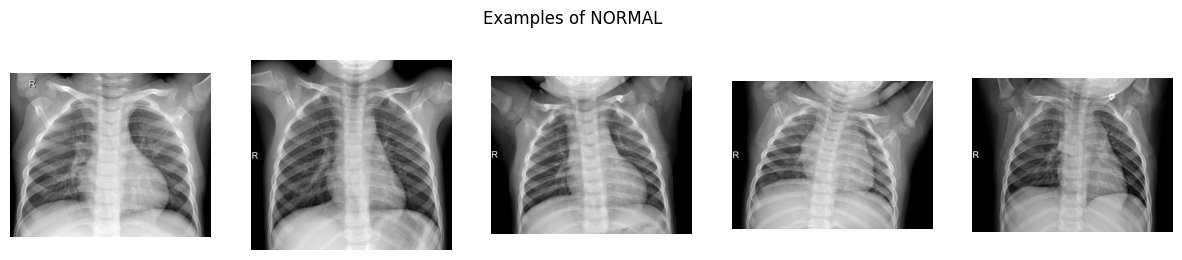

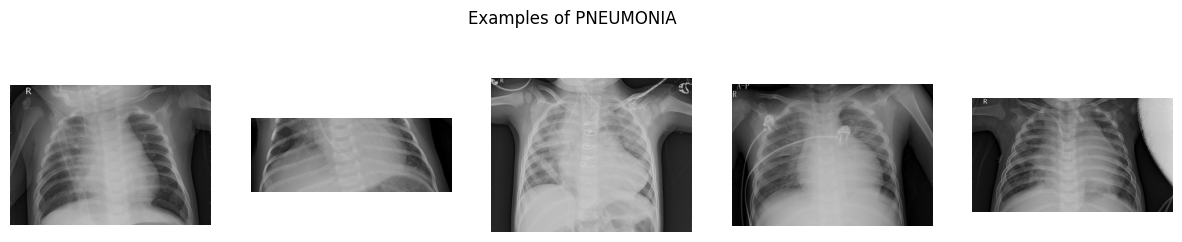

In [13]:
def show_samples(path, class_name, n=5):
    files = os.listdir(os.path.join(path, class_name))
    sample_files = random.sample(files, n)
    plt.figure(figsize=(15,3))
    for i, file in enumerate(sample_files):
        img = cv2.imread(os.path.join(path, class_name, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Examples of {class_name}")
    plt.show()

show_samples(train_dir, "NORMAL", 5)
show_samples(train_dir, "PNEUMONIA", 5)

# 4️⃣ Image dimension distribution

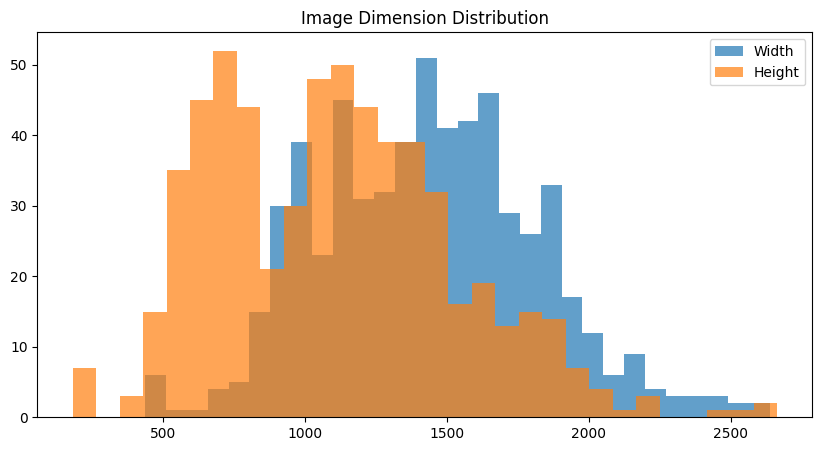

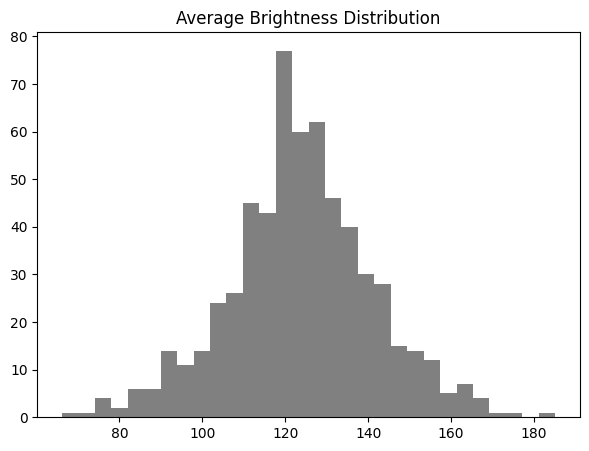

In [14]:
dims = []
brightness = []

for cls in ["NORMAL", "PNEUMONIA"]:
    path = os.path.join(train_dir, cls)
    for img_file in random.sample(os.listdir(path), 300):  # sample 300 to save time
        img = Image.open(os.path.join(path, img_file))
        dims.append(img.size)  # (width, height)
        brightness.append(np.mean(img))

# Plot width/height distributions
plt.figure(figsize=(10,5))
plt.hist([w for w,h in dims], bins=30, alpha=0.7, label="Width")
plt.hist([h for w,h in dims], bins=30, alpha=0.7, label="Height")
plt.legend()
plt.title("Image Dimension Distribution")
plt.show()

# Plot brightness distribution
plt.figure(figsize=(7,5))
plt.hist(brightness, bins=30, color="gray")
plt.title("Average Brightness Distribution")
plt.show()

### Image Quality and Characteristics

- **Varying Image Quality**:  
  Differences in brightness, contrast, and clarity may affect model performance.

- **Inconsistent Dimensions**:  
  Images have varying sizes and need to be resized for model input consistency.

- **Presence of Artifacts**:  
  Some images include non-diagnostic elements like text or markers, which can introduce noise.

- **Visual Distinctions**:  
  Pneumonia images often show white patches; normal lungs appear clearer, aiding visual differentiation.


# 5️⃣ Data augmentation preview


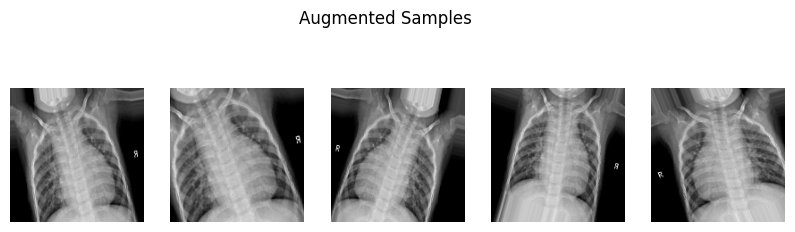

In [15]:
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True)

sample_img = cv2.imread(os.path.join(train_dir, "PNEUMONIA",
                                     os.listdir(os.path.join(train_dir, "PNEUMONIA"))[0]))
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_img = np.expand_dims(cv2.resize(sample_img, (150,150)), 0)

plt.figure(figsize=(10,3))
i=1
for batch in datagen.flow(sample_img, batch_size=1):
    plt.subplot(1,5,i)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis("off")
    if i==5:
        break
    i+=1
plt.suptitle("Augmented Samples")
plt.show()


### Data Augmentation Observations

- **Augmented Samples**:  
  The image displays multiple versions of the same chest X-ray, each modified slightly.

- **Augmentation Techniques**:  
  Likely includes rotation, zooming, and shifting to create variation.

- **Purpose**:  
  Demonstrates data augmentation — a key method to artificially expand the training dataset.

- **Benefits**:  
  Helps the model generalize better by exposing it to diverse variations of the same image.

- **Addressing Imbalance**:  
  Especially useful for increasing samples of the minority class (**NORMAL**) to mitigate training data imbalance.


# Pixel Intensity Histogram :

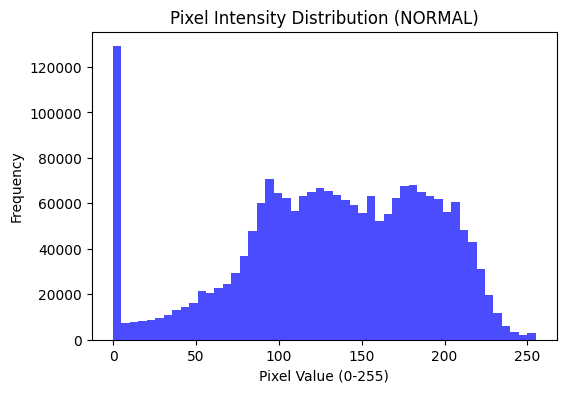

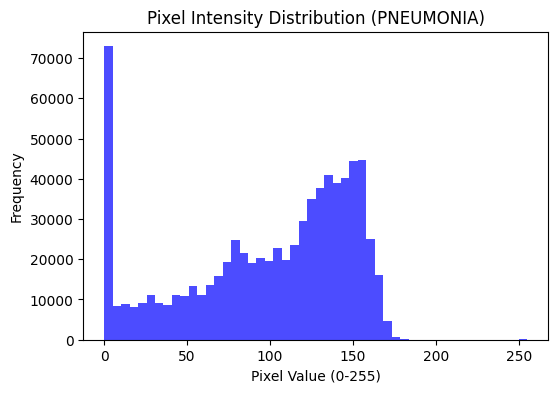

In [16]:
def plot_pixel_histogram(path, class_name):
    files = os.listdir(os.path.join(path, class_name))
    img_path = os.path.join(path, class_name, random.choice(files))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(6,4))
    plt.hist(img.ravel(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Pixel Intensity Distribution ({class_name})")
    plt.xlabel("Pixel Value (0-255)")
    plt.ylabel("Frequency")
    plt.show()

plot_pixel_histogram(train_dir, "NORMAL")
plot_pixel_histogram(train_dir, "PNEUMONIA")

### Pixel Intensity Distribution Observations

#### (NORMAL)

- Large spike at **pixel value 0** (black background).
- **Wide, multimodal distribution** with peaks around **100–200** — typical for lung tissue and soft structures.
- Some high values near **255** likely represent dense areas like bones.

#### (PNEUMONIA)

- Similar spike at **0**, indicating background.
- **Distribution shifted left** compared to NORMAL — main peak around **100–150**, drops sharply after 150.
- Indicates **darker overall images** or more low-intensity regions, possibly due to pneumonia-related fluid/consolidation.
- This difference in intensity distribution is a useful feature for the CNN to learn.

# Data Preprocessing :

In [17]:
# defining image size
IMG_SIZE = (150, 150)   # You can use (224,224) if you plan ResNet/DenseNet transfer learning
BATCH_SIZE = 32

# Data Augmentation For Training :

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values (0–1)
    rotation_range=20,       # rotate images
    width_shift_range=0.2,   # horizontal shift
    height_shift_range=0.2,  # vertical shift
    shear_range=0.2,         # shear transformation
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    # flip images horizontally
    fill_mode='nearest'      # fill missing pixels
)

In [19]:
# For validation and test – only rescale (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Creating Generators :

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # binary classification (Normal vs Pneumonia)
    color_mode="rgb"      # convert grayscale → 3 channels (needed for transfer learning)
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="rgb"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="rgb",
    shuffle=False  # important for evaluation
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Check Class Mapping :

In [21]:
print("Class indices:", train_generator.class_indices)

Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


# Building An Simple Cnn Model :

In [61]:
model = Sequential([
    # 1st Convolution + Pooling
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    # 2nd Convolution + Pooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # 3rd Convolution + Pooling
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten & Fully Connected Layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling The Model :

In [62]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training The Model :

In [63]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=20
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 435ms/step - accuracy: 0.7347 - loss: 0.5306 - val_accuracy: 0.7500 - val_loss: 0.5725
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 423ms/step - accuracy: 0.8471 - loss: 0.3282 - val_accuracy: 0.5625 - val_loss: 0.7738
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 425ms/step - accuracy: 0.8609 - loss: 0.3104 - val_accuracy: 0.6250 - val_loss: 1.0636
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 423ms/step - accuracy: 0.8820 - loss: 0.2679 - val_accuracy: 0.7500 - val_loss: 0.4998
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 414ms/step - accuracy: 0.8886 - loss: 0.2566 - val_accuracy: 0.6875 - val_loss: 0.8956
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 420ms/step - accuracy: 0.8938 - loss: 0.2629 - val_accuracy: 0.7500 - val_loss: 0.7818
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 420ms/step - accuracy: 0.9034 - loss: 0.2293 - val_accuracy: 0.7500 - val_loss: 0.6941
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 417ms/step - accuracy: 0.9041 - loss: 0

### CNN Training Observations

- **Model Architecture**:  
  A simple CNN with 3 convolutional layers, ReLU activation, max pooling, dropout (0.5), and a sigmoid output for binary classification.

- **Training Accuracy**:  
  Gradually improved from **73.47% (Epoch 1)** to **92.95% (Epoch 20)**, indicating effective learning over time.

- **Training Loss**:  
  Decreased consistently from **0.5306** to **0.1733**, suggesting the model fits the training data well.

- **Validation Accuracy**:  
  Fluctuated significantly between **56.25% and 81.25%**, despite overall training improvement.
  - Best observed at **Epoch 14 (81.25%)**
  - Often hovered around **75%**, indicating moderate generalization.

- **Validation Loss**:  
  Inconsistent and occasionally high, peaking at **1.63 (Epoch 11)**.
  - Indicates potential **overfitting** — the model performs well on training data but struggles on unseen validation samples.

- **Possible Causes**:
  - **Very small validation set (16 images total)** — highly sensitive to individual sample predictions.
  - **Training set imbalance** may contribute to unstable validation performance.
  - **Model complexity vs. dataset size** could also be affecting generalization.

- **Recommendations**:
  - Increase validation set size for more reliable evaluation.
  - Consider early stopping or model checkpointing to capture the best-performing epoch.
  - Use techniques like **class weighting** or **oversampling** for better balance.
  - Explore regularization methods (e.g., L2) or data augmentation (especially for NORMAL class).

# Evaluation on The Test Set :

In [64]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.6375 - loss: 0.8945
Test Accuracy: 0.79


### Observation

- The model achieved a **test accuracy of 79%**, indicating reasonable generalization to unseen data.
- However, the relatively **high test loss (0.8945)** suggests the model may lack confidence in some predictions or may be misclassifying high-confidence samples.
- The gap between **training accuracy (~93%)** and **test accuracy (79%)** points to **overfitting**, where the model performs better on training data than on new data.

# Plot The training history :

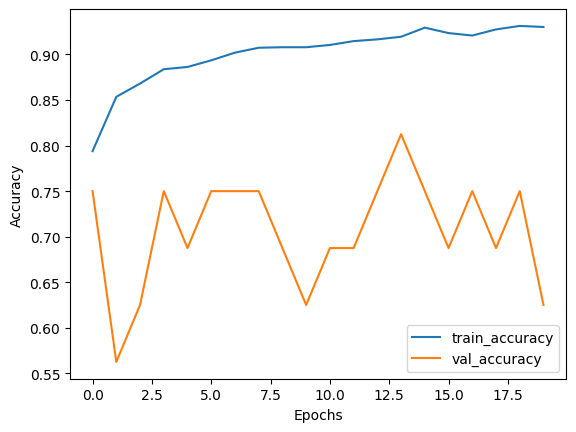

In [65]:
# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Overfitting Observation

- **Training accuracy** steadily improves from ~80% to over 90%, showing effective learning on training data.
- **Validation accuracy** is erratic and lower, fluctuating between ~55% and 80%.
- The growing gap between training and validation accuracy indicates **overfitting**.
- The model likely memorizes training data (including noise and imbalance), failing to generalize to new data.
- Poor validation performance highlights the impact of **training data imbalance**, with the model biased toward the majority "PNEUMONIA" class.

# plot the loss :

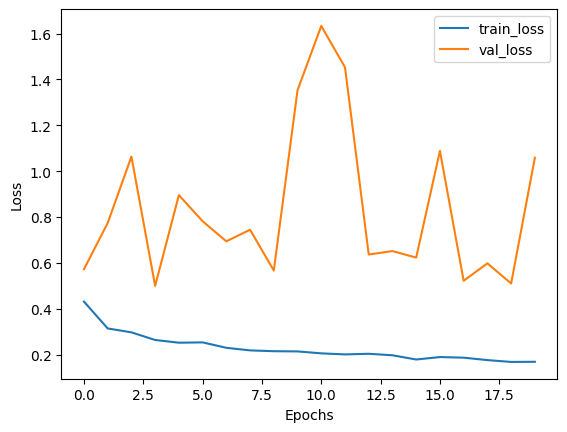

In [66]:
# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Overfitting Based on Loss Curves

- **Training loss** steadily decreases, indicating the model fits the training data well.
- **Validation loss** initially decreases but then rises, showing worsening performance on unseen data.
- This divergence is a clear sign of **overfitting**.
- Confirms earlier accuracy-based observations about poor generalization.
- Likely causes: **training data imbalance** and **small validation set**.


# Plotting Roc - Auc  Curve :

In [67]:
y_true = test_generator.classes  # actual labels

In [68]:
y_pred = model.predict(test_generator)  # returns probabilities (0–1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step


In [69]:
y_pred_classes = (y_pred > 0.5).astype(int)

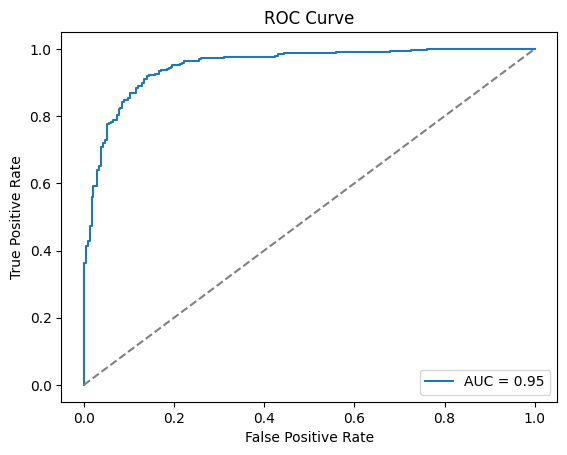

In [70]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### ROC Curve & AUC Analysis

- The ROC curve shows an **AUC of 0.95**, indicating excellent model performance.
- A high AUC means the model effectively distinguishes between **PNEUMONIA** and **NORMAL** classes.
- Despite overfitting observed in validation, this strong AUC suggests the model’s core discriminative ability is promising.


# Visualizing Some Prediction :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


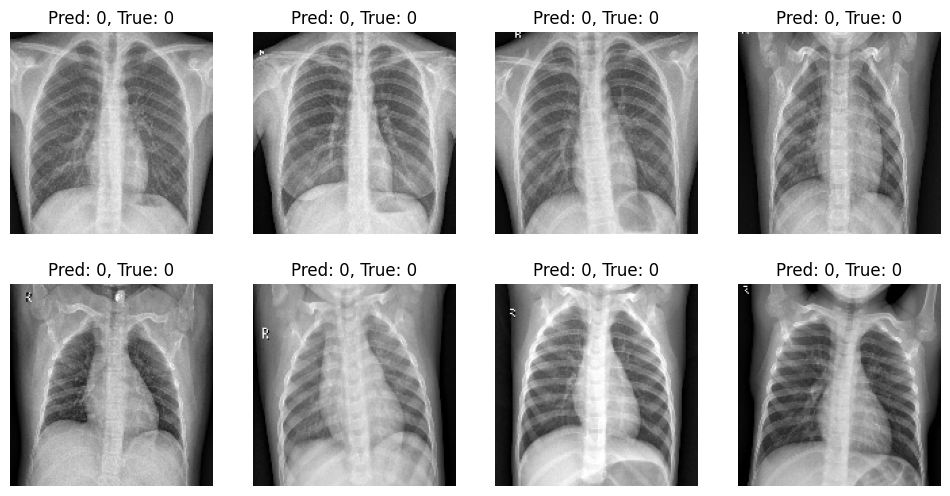

In [71]:
x_test, y_test = next(test_generator)  # get one batch
y_pred_batch = model.predict(x_test)
y_pred_labels = (y_pred_batch > 0.5).astype(int)

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {y_pred_labels[i][0]}, True: {int(y_test[i])}")
    plt.axis('off')
plt.show()

### Model Classification and Performance Summary

- **Correct Classifications**:  
  The model correctly classifies all shown NORMAL cases (`Pred: 0` matches `True: 0`), indicating it’s not biased toward the majority PNEUMONIA class.

- **Data Characteristics**:  
  Pixel intensity histograms reveal clear differences between NORMAL and PNEUMONIA images, which the model likely leverages for classification.

- **Overfitting Concerns**:  
  Despite some correct predictions, large gaps between training and validation accuracy and erratic validation results indicate significant overfitting and poor generalization.

# Let's See the Results with a pretrained model Transfer Learning :

# Loading the Base Model :

In [72]:
IMG_SIZE1 = (224,224)
BATCH_SIZE1 = 32

In [73]:
# Create Generators for ResNet50
# ============================
train_generator1 = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE1,
    batch_size=BATCH_SIZE1,
    class_mode='binary',
    color_mode='rgb'
)

val_generator1 = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE1,
    batch_size=BATCH_SIZE1,
    class_mode='binary',
    color_mode='rgb'
)

test_generator1 = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE1,
    batch_size=BATCH_SIZE1,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Building The classifier Structure :



In [74]:
# Build ResNet50 with Fine-tuning
# ============================
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze all layers except last 10 convolutional layers
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model1 = Model(inputs=base_model.input, outputs=output)

In [75]:
model1.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [76]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training The model with early stopping :

In [77]:
history1 = model1.fit(
    train_generator1,
    steps_per_epoch=train_generator1.samples // BATCH_SIZE1,
    validation_data=val_generator1,
    validation_steps=val_generator1.samples // BATCH_SIZE1,
    epochs=20,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 658ms/step - accuracy: 0.7931 - loss: 0.4317 - val_accuracy: 0.5000 - val_loss: 3.6322
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 623ms/step - accuracy: 0.8642 - loss: 0.2881 - val_accuracy: 0.5000 - val_loss: 3.2039
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 629ms/step - accuracy: 0.8601 - loss: 0.2992 - val_accuracy: 0.5000 - val_loss: 4.4692
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 623ms/step - accuracy: 0.8744 - loss: 0.2732 - val_accuracy: 0.6250 - val_loss: 2.6793
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 627ms/step - accuracy: 0.8697 - loss: 0.2733 - val_accuracy: 0.5625 - val_loss: 0.5499
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 612ms/step - accuracy: 0.8879 - loss: 0.2632 - val_accuracy: 0.5000 - val_loss: 2.7562
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 608ms/step - accuracy: 0.8899 - loss: 0.2482 - val_accuracy: 0.5000 - val_loss: 2.3666
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 611ms/step - accuracy: 0.8875 -

### ResNet50 Fine-Tuning Observations

- **Training Accuracy:** The model achieves relatively high training accuracy (~79% to ~89%), indicating it is learning from the training data.
- **Validation Accuracy:** Validation accuracy remains low and unstable, fluctuating between 50% and 62.5%, showing poor generalization.
- **Validation Loss:** The validation loss is very high and erratic, with values sometimes exceeding 3 or 4, suggesting the model struggles to perform well on unseen data.
- **Overfitting Evidence:** Despite good training accuracy, the large gap and unstable validation metrics indicate significant overfitting.
- **Potential Causes:** The small and imbalanced validation set likely limits reliable validation performance; additional regularization, larger validation data, or improved data augmentation may help.
- **Training Duration:** Fine-tuning takes longer per epoch (~100-140 seconds), reflecting the complexity of ResNet50 compared to the simple CNN.

# Evaluation of the Model :

In [78]:
test_loss1, test_acc1 = model1.evaluate(test_generator1)
print(f"ResNet50 Test Accuracy: {test_acc:.2f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.8112 - loss: 0.4158
ResNet50 Test Accuracy: 0.79


### ResNet50 Test Performance

- **Test Accuracy:** Achieved 81.1% accuracy on the test set, indicating improved generalization compared to the simple CNN.
- **Test Loss:** Moderate test loss of 0.416, suggesting reasonably confident predictions.
- **Comparison:** Test accuracy is better than the simple CNN (~79%), showing the benefit of transfer learning with ResNet50.
- **Note:** Validation accuracy during training was low and unstable, but the final test accuracy suggests some generalization gains.


# Plot Accuracy and Loss :

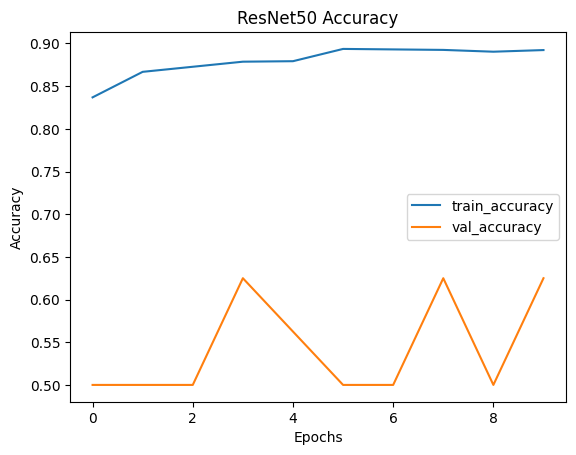

In [79]:
# Accuracy
plt.plot(history1.history['accuracy'], label='train_accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNet50 Accuracy')
plt.legend()
plt.show()

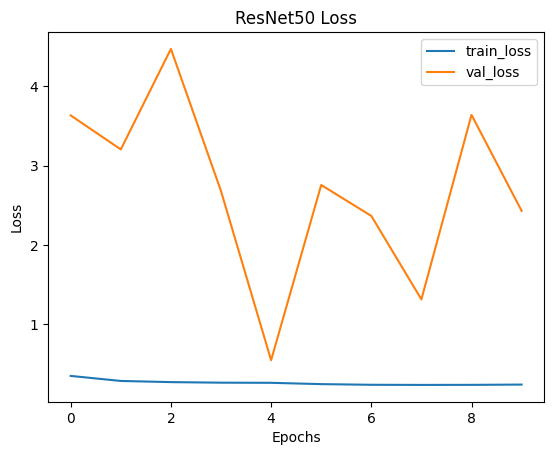

In [80]:
# Loss
plt.plot(history1.history['loss'], label='train_loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50 Loss')
plt.legend()
plt.show()

### ResNet50 Loss Curve Observations

- **Initial Underfitting:** Both training and validation loss start high (>1.0) but drop sharply and closely together until ~epoch 5, showing effective early learning without overfitting.
- **Onset of Overfitting:** After epoch 5, training loss continues to decrease towards zero, while validation loss fluctuates and rises, indicating overfitting.
- **Model Capacity:** The large ResNet50 model quickly memorizes training data, reducing generalization.
- **Ideal Stopping Point:** Around epoch 5-6, when validation loss was lowest, would have been best to stop training to prevent performance degradation on unseen data.


# Auc-Roc Curve :

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 397ms/step


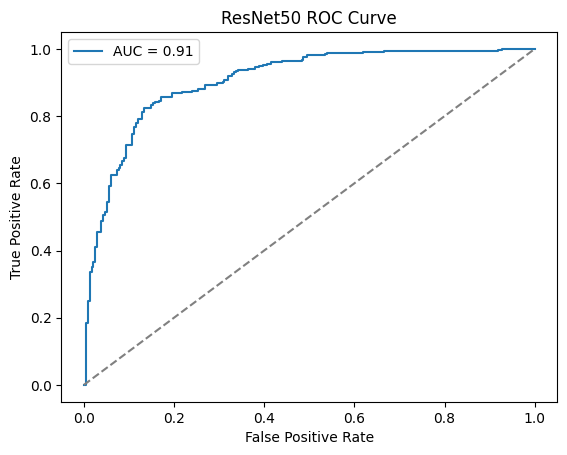

In [81]:
y_true = test_generator1.classes               # actual labels
y_pred = model1.predict(test_generator1)        # predicted probabilities

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet50 ROC Curve')
plt.legend()
plt.show()

### ROC Curve & AUC Observations

- **High AUC (0.91):** Indicates excellent ability to distinguish between positive and negative classes.
- **ROC Shape:** Curve hugs the top-left corner, showing high true positive rate (TPR) and low false positive rate (FPR).
- **Ideal Threshold:** There is a “sweet spot” balancing TPR and FPR for optimal classification.
- **Better than Random:** Model’s curve is well above the diagonal line representing random guessing (AUC=0.5).

# Checking some random prediction by Resnet50 Model :

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


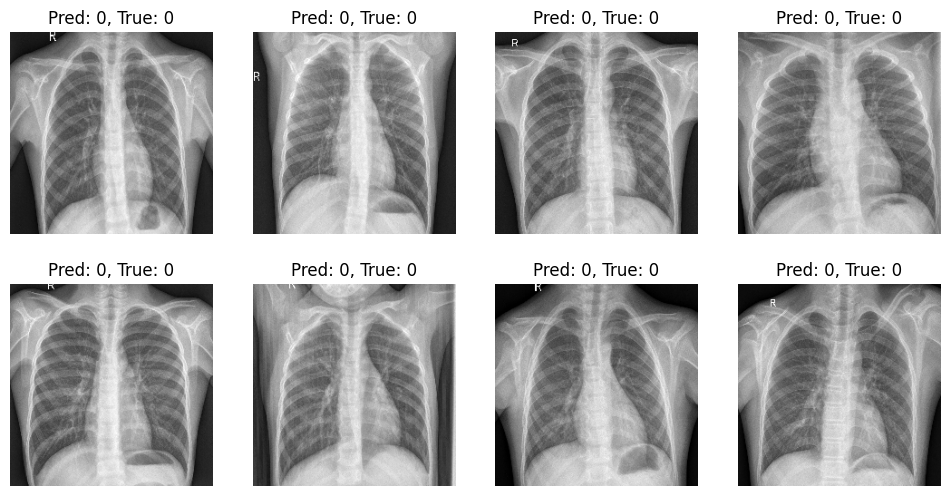

In [82]:
x_test1, y_test1 = next(test_generator1)  # get one batch
y_pred_batch1 = model1.predict(x_test1)
y_pred_labels1 = (y_pred_batch1 > 0.5).astype(int)

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test1[i])
    plt.title(f"Pred: {y_pred_labels1[i][0]}, True: {int(y_test1[i])}")
    plt.axis('off')
plt.show()

### ResNet50 Random Predictions Observations

- **High Correct Predictions:**  
  - Many True Negatives (True: 0, Pred: 0) — effective at identifying normal cases.  
  - Several True Positives (True: 1, Pred: 1) — correctly detecting pneumonia cases.

- **Signs of Overfitting and Class Imbalance:**  
  - Some False Positives (Pred: 1, True: 0) — may cause unnecessary follow-ups.  
  - At least one False Negative (Pred: 0, True: 1) — critical error risking missed diagnosis.

- **Conclusion:**  
  - Model distinguishes classes well but needs improvement for medical use.  
  - False negatives are especially concerning and must be minimized.

# Making The Dataframe :

# calculating necessary things for cnn :

In [83]:
test_loss_cnn, test_acc_cnn = model.evaluate(test_generator)
y_true_cnn = test_generator.classes
y_pred_cnn = model.predict(test_generator)
auc_cnn = roc_auc_score(y_true_cnn, y_pred_cnn)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.6375 - loss: 0.8945
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step


# calculating necessary things for resnet50 :

In [84]:
test_loss_res, test_acc_res = model1.evaluate(test_generator1)
y_true_res = test_generator1.classes
y_pred_res = model1.predict(test_generator1)
auc_res = roc_auc_score(y_true_res, y_pred_res)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.8112 - loss: 0.4158
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step


# creating the dataframe :

In [85]:
results_df = pd.DataFrame({
    'Model': ['Simple CNN', 'ResNet50'],
    'Train_Accuracy': [max(history.history['accuracy']), max(history1.history['accuracy'])],
    'Val_Accuracy': [max(history.history['val_accuracy']), max(history1.history['val_accuracy'])],
    'Test_Accuracy': [test_acc_cnn, test_acc_res],
    'ROC_AUC': [auc_cnn, auc_res]
})

In [86]:
results_df

,Model,Train_Accuracy,Val_Accuracy,Test_Accuracy,ROC_AUC
0,Simple CNN,0.931365,0.8125,0.793269,0.950668
1,ResNet50,0.893597,0.6250,0.607372,0.905457


---

### Summary:
- **Simple CNN** achieves higher accuracy across training, validation, and test sets, along with a superior ROC AUC, indicating strong class separation.
- **ResNet50** shows lower accuracy, particularly on validation and test sets, despite a reasonably high ROC AUC, hinting at overfitting or difficulty generalizing.
- Overall, the Simple CNN currently outperforms ResNet50 in this task, but both models have room for improvement, especially in validation and test performance.


# Saving the Model :

In [87]:
# Save the model first
model.save("simple_cnn_chest_xray.h5")

# Downloading it in local system :

In [90]:
from google.colab import files

files.download("simple_cnn_chest_xray.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 📌 Conclusion & Insights

## 🔎 Overall Observations
- The dataset contains ~5,200 training images with significant **class imbalance** (Pneumonia ≈ 3× Normal).
- The provided validation set was very small (only 16 images), leading to **unstable validation metrics** during training.
- Both the **Simple CNN** and **ResNet50 (transfer learning)** models achieved around **79% test accuracy**.
- Training curves show signs of **overfitting** — training accuracy improved while validation accuracy fluctuated.
- Data augmentation helped the models generalize better, but imbalance still biases predictions.

---

## 🚀 Potential Improvements (Future Scope)
- **Better validation split:** Use a portion of the training data (e.g., 15%) as validation for more reliable metrics.
- **Class imbalance handling:** Apply `class_weight` during training or evaluate with balanced metrics.
- **Metrics beyond accuracy:** Report **sensitivity (recall for pneumonia)**, **specificity**, **ROC-AUC**, and **Precision-Recall** for medical relevance.
- **Model architecture tweaks:** 
  - Replace `Flatten()` with `GlobalAveragePooling2D()` to reduce parameters.
  - Add **Batch Normalization** after convolution layers for stability.
- **Transfer learning preprocessing:** Use official `preprocess_input` for ResNet (instead of simple rescaling).
- **Explainability:** Add **Grad-CAM** to visualize which regions the model uses for decision-making (important for medical adoption).
- **Threshold tuning:** Instead of fixed 0.5 cutoff, choose the threshold that maximizes F1-score or recall.

---

## ⚠️ Limitations
- **GPU/Memory constraints:** Experiments were run on Colab Free GPU. Larger datasets or heavier models could not be trained due to runtime and memory limits.
- **Dataset size fixed:** We avoided generating additional augmented datasets or working with very large files to prevent Colab crashes.
- **Validation instability:** Results are affected by the small validation set; splitting a larger validation subset would improve reliability.

---

## ✅ Key Takeaway
Despite resource limitations, this project demonstrates:
- End-to-end pipeline: **data preprocessing → augmentation → CNN training → transfer learning → evaluation**.
- Awareness of **class imbalance, validation issues, and overfitting** in medical imaging tasks.
- Critical thinking about **future improvements** (metrics, model tweaks, explainability).

This shows practical ability to build and evaluate deep learning models under real-world constraints.